In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [12]:
# List of quantum computing-related companies and their ticker symbols
quantum_companies = [
    'IBM', 'IONQ', 'RGTI', 'QUBT', 'QBTS', 'NVDA', 'GOOGL',
    'MSFT', 'HON', 'INTC', 'ARQQ', 'BABA', 'ACN', 'FJTSY', 
    'NIPNF', 'AEXAY', 'AMZN', 'EADSY'
]

# Download stock price data for the last year
stock_data = yf.download(quantum_companies, period="1y")['Close']
# Save the data to a CSV file (optional)
stock_data.to_csv("quantum_companies_stock_data.csv")

[*********************100%***********************]  19 of 19 completed

1 Failed download:
['TOSYY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")')


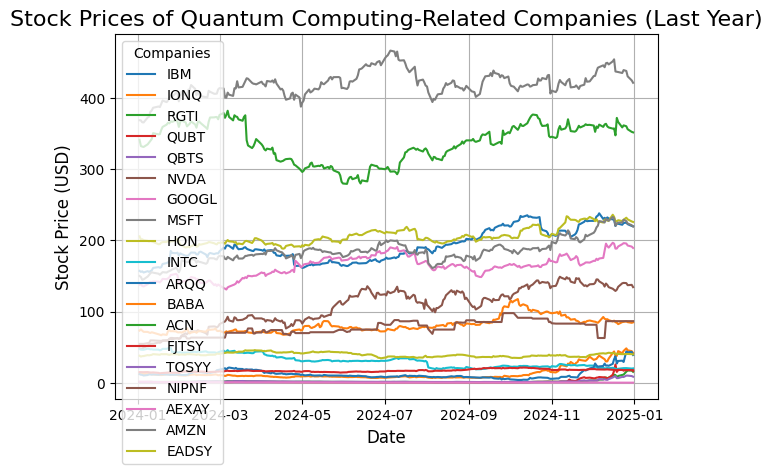

In [10]:
for company in quantum_companies:
    if company in stock_data:  # Ensure the company has valid data
        plt.plot(stock_data[company], label=company)

# Customize the plot
plt.title("Stock Prices of Quantum Computing-Related Companies (Last Year)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend(title="Companies", loc="upper left", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
max_values = stock_data.max()
max_values_dict = {ticker: value for ticker, value in max_values.items()}

# Calculate thresholds for quartiles (25th, 50th, 75th percentiles)
q1 = np.percentile(list(max_values_dict.values()), 25)
q2 = np.percentile(list(max_values_dict.values()), 50)
q3 = np.percentile(list(max_values_dict.values()), 75)

# Create dictionaries for each quartile
quartile_1 = {key: value for key, value in max_values_dict.items() if value <= q1}
quartile_2 = {key: value for key, value in max_values_dict.items() if q1 < value <= q2}
quartile_3 = {key: value for key, value in max_values_dict.items() if q2 < value <= q3}
quartile_4 = {key: value for key, value in max_values_dict.items() if value > q3}

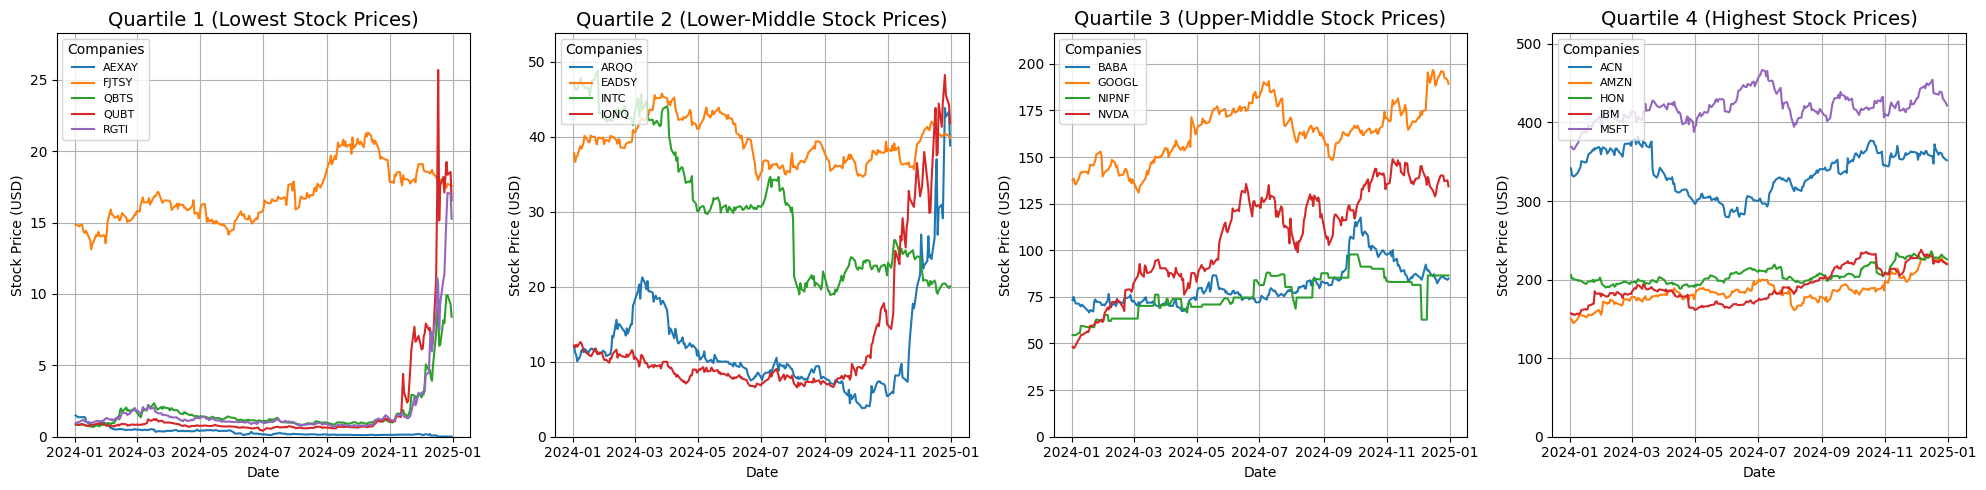

In [34]:
# Function to add a subplot for a given quartile with appropriate scaling
def add_subplot_rescaled(ax, group, title):
    for ticker in group:
        if ticker in stock_data:
            ax.plot(stock_data[ticker], label=ticker)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel("Stock Price (USD)", fontsize=10)
    ax.legend(title="Companies", loc="upper left", fontsize=8)
    ax.grid(True)
    if group:  # Ensure the group is not empty before setting limits
        prices = stock_data[list(group)].max().values
        ax.set_ylim(0, max(prices) * 1.1)  # Set y-limits slightly above the max value

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Add each quartile's data to a subplot with rescaling
add_subplot_rescaled(axes[0], quartile_1.keys(), "Quartile 1 (Lowest Stock Prices)")
add_subplot_rescaled(axes[1], quartile_2.keys(), "Quartile 2 (Lower-Middle Stock Prices)")
add_subplot_rescaled(axes[2], quartile_3.keys(), "Quartile 3 (Upper-Middle Stock Prices)")
add_subplot_rescaled(axes[3], quartile_4.keys(), "Quartile 4 (Highest Stock Prices)")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
